In [3]:
#Importing necessary libraries

import random as rn
import os
import pandas as pd
import numpy as np
import shutil
from shutil import copyfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib as plt
import tensorflow as tf
from sklearn import svm
from skimage.io import imread
from skimage.transform import resize
%matplotlib inline

In [2]:
#Defining the path to the data directories
#One path will be for the csv which contains information about the classification and the other is folder with the images

df = pd.read_csv('Galaxy_Classes.csv')
pic_all = "images/"

## Data and Directory Preperation

In [3]:
try:
   os.makedirs("sorted_images")
except FileExistsError:
   # directory already exists
   pass

try:
   
   os.makedirs("split_images")
except FileExistsError:
   # directory already exists
   pass

In [4]:
folder = 'sorted_images'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [5]:
folder = 'split_images'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [6]:
try:
   os.makedirs("sorted_images\images_sct")
except FileExistsError:
   # directory already exists
   pass

try:
   os.makedirs("sorted_images\images_er")
except FileExistsError:
   # directory already exists
   pass

try:
   os.makedirs("sorted_images\images_ec")
except FileExistsError:
   # directory already exists
   pass

In [7]:
src_directory = "images"
sct_directory = "sorted_images\images_sct"
er_directory = "sorted_images\images_er"
ec_directory = "sorted_images\images_ec"

In [8]:
df.head(10)

,objid,sample,asset_id,gz2_class,category
0,5.880000e+17,original,3,Sc?l,Spiral
1,5.880000e+17,original,4,Sc?l,Spiral
2,5.880000e+17,original,5,Er,Elliptical
3,5.880000e+17,original,6,Sc1t,Spiral
4,5.880000e+17,original,7,Sc1t,Spiral
5,5.880000e+17,original,8,Sc1t,Spiral
6,5.880000e+17,original,9,Sc1t,Spiral
7,5.880000e+17,original,11,Sb,Spiral
8,5.880000e+17,original,12,Sb,Spiral
9,5.880000e+17,original,13,Ec,Elliptical


In [9]:
df = df[(df['gz2_class'] == 'Sc?t') | (df['gz2_class'] == 'Ec') | (df['gz2_class'] == 'Er')]
df['gz2_class'].value_counts()

Er      44637
Sc?t    14563
Ec       9154
Name: gz2_class, dtype: int64

C:\Users\SophieJones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gz2_class', ylabel='count'>

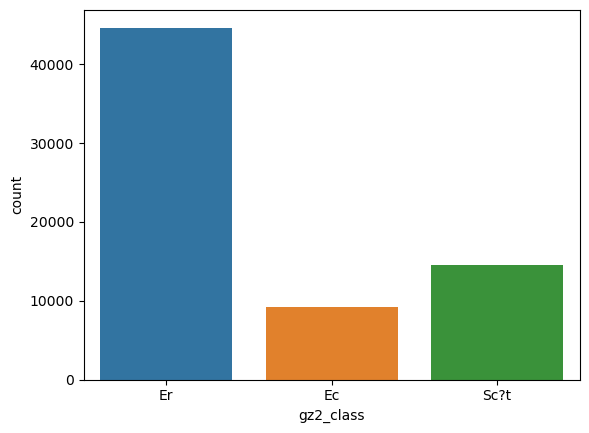

In [10]:
sns.countplot(df['gz2_class'])

In [11]:
#Now selecting only a sample of 600 records from the dataframe and creating a new one which will be used in extracting images

df_sample = df.sample(n=10000, replace=False, random_state=1)

In [12]:
df_sample

,objid,sample,asset_id,gz2_class,category
230151,5.880000e+17,extra,250089,Er,Elliptical
142430,5.880000e+17,original,155153,Er,Elliptical
43418,5.880000e+17,original,49148,Er,Elliptical
245014,5.880000e+17,extra,266724,Er,Elliptical
16444,5.880000e+17,original,18589,Er,Elliptical
...,...,...,...,...,...
32875,5.880000e+17,original,37041,Er,Elliptical
55095,5.880000e+17,original,61162,Sc?t,Spiral
71783,5.880000e+17,original,78936,Er,Elliptical
211690,5.880000e+17,original,230319,Er,Elliptical


C:\Users\SophieJones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


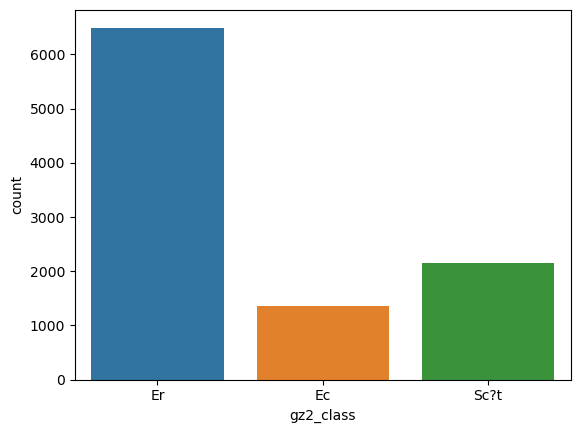

In [13]:
sns.countplot(df_sample['gz2_class']);

In [14]:
#Making a copy of the column being encoded

df_sample['category_encoded'] = df_sample['gz2_class']

In [15]:
df_sample.head()

,objid,sample,asset_id,gz2_class,category,category_encoded
230151,5.880000e+17,extra,250089,Er,Elliptical,Er
142430,5.880000e+17,original,155153,Er,Elliptical,Er
43418,5.880000e+17,original,49148,Er,Elliptical,Er
245014,5.880000e+17,extra,266724,Er,Elliptical,Er
16444,5.880000e+17,original,18589,Er,Elliptical,Er


In [16]:
#Label encoding the category (target) feature in the data frame

le = LabelEncoder()
df_sample['category_encoded'] = le.fit_transform(df_sample['category_encoded'])

In [17]:
df_sample
df_sample.head(20)

,objid,sample,asset_id,gz2_class,category,category_encoded
230151,5.880000e+17,extra,250089,Er,Elliptical,1
142430,5.880000e+17,original,155153,Er,Elliptical,1
43418,5.880000e+17,original,49148,Er,Elliptical,1
245014,5.880000e+17,extra,266724,Er,Elliptical,1
16444,5.880000e+17,original,18589,Er,Elliptical,1
191790,5.880000e+17,original,209717,Er,Elliptical,1
246765,5.880000e+17,extra,268835,Ec,Elliptical,0
90980,5.880000e+17,original,98623,Er,Elliptical,1
184234,5.880000e+17,original,200844,Ec,Elliptical,0
109017,5.880000e+17,original,118570,Er,Elliptical,1


In [18]:
df_ec = df_sample[df_sample.category_encoded == 0]
df_sct = df_sample[df_sample.category_encoded == 2]
df_er = df_sample[df_sample.category_encoded==1]

In [19]:
#Undersampling and shuffling data to irregular level

df_ersampled = df_er.sample(n=len(df_ec), random_state=101)
df_sctsampled = df_sct.sample(n=len(df_ec), random_state=101)
df_balanced = pd.concat([df_ersampled,df_sctsampled, df_ec],axis=0)

In [20]:
#Shuffling the data and resetting the index

df_processed = df_balanced.sample(frac=1).reset_index(drop=True)

df_processed

,objid,sample,asset_id,gz2_class,category,category_encoded
0,5.880000e+17,original,186327,Ec,Elliptical,0
1,5.880000e+17,original,4509,Er,Elliptical,1
2,5.890000e+17,original,244042,Sc?t,Spiral,2
3,5.880000e+17,stripe82,284892,Sc?t,Spiral,2
4,5.880000e+17,original,206955,Sc?t,Spiral,2
...,...,...,...,...,...,...
4042,5.880000e+17,original,167383,Er,Elliptical,1
4043,5.880000e+17,extra,259434,Sc?t,Spiral,2
4044,5.880000e+17,original,78950,Er,Elliptical,1
4045,5.880000e+17,original,195253,Sc?t,Spiral,2


In [21]:
df_processed.dtypes

objid               float64
sample               object
asset_id              int64
gz2_class            object
category             object
category_encoded      int32
dtype: object

for i in range(len(df_processed.index)):
    df_processed['path'][i] = "images"+"\\"+str(df_processed['asset_id'][i])+".csv"

df_processed['path']

df_processed[[os.path.isfile(i.split('\\').str[-1]) for i in df_processed['path']]]

C:\Users\SophieJones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


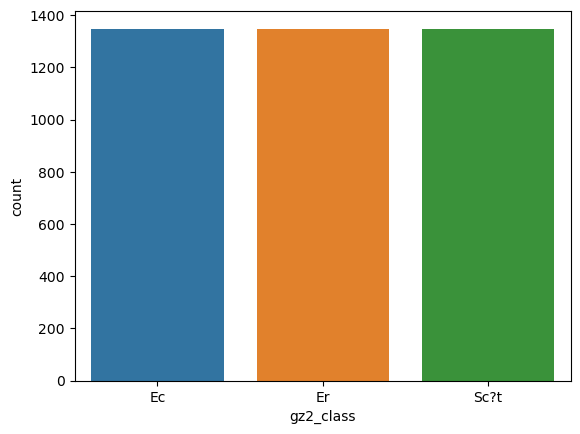

In [22]:
sns.countplot(df_processed['gz2_class']);

In [23]:
for i in range(len(df_processed.index)):
    try:
        fileName = df_processed['asset_id'][i]
        print(fileName)
        src_file = src_directory + "\\" + str(fileName) + ".jpg"
        print(df_processed['category_encoded'][i])
        if df_processed['category_encoded'][i] == 2:
            dest_file = sct_directory + "\\" + str(fileName) + ".jpg"
        elif df_processed['category_encoded'][i] == 0:
            dest_file = ec_directory + "\\" + str(fileName) + ".jpg"
        else:
            dest_file = er_directory + "\\" + str(fileName) + ".jpg"
        copyfile(src_file, dest_file)
    except:
        pass

186327
0
4509
1
244042
2
284892
2
206955
2
80724
2
39652
0
72866
2
128750
1
289920
1
82269
0
143027
0
207838
0
9344
0
180550
2
252745
1
4890
2
38760
1
122906
1
281833
2
59702
2
97661
2
179738
0
159778
1
68914
2
51248
2
95325
0
276534
0
83724
1
94200
1
208209
0
288860
1
279834
1
85917
1
144903
2
82810
1
241194
0
214911
2
222280
2
178115
2
49420
0
254630
2
240786
1
87395
1
86468
2
255320
0
103473
1
28210
0
225063
2
64504
1
196574
1
222354
0
282308
0
22986
0
264068
0
249424
0
134003
2
163401
0
45281
1
62678
2
228904
1
2472
1
78351
2
253025
2
106782
1
70619
1
26611
0
55708
0
402
1
281578
0
293968
0
39544
1
132036
2
279890
1
206483
0
139792
2
8671
2
216268
0
78669
2
56263
1
131860
0
204724
0
279479
2
33924
0
276440
2
205934
1
285795
0
194587
1
148244
0
63223
2
156278
0
231825
1
13408
1
174417
1
158226
1
74141
1
10133
0
3997
2
274473
2
185702
2
28161
1
199356
1
20350
0
95216
0
150726
2
273689
2
190540
0
15970
0
259115
2
34254
2
229302
1
85514
1
4229
1
227776
2
110594
2
95790
1
224353
2
17326

In [24]:
# use !pip install split-folders once

import splitfolders

input_folder = 'sorted_images/'

splitfolders.ratio(input_folder, output='split_images',seed=42, ratio=(.75,.25), group_prefix=None)

Copying files: 3682 files [00:34, 105.85 files/s]


## Training

In [1]:
flat_data_arr=[]
target_arr=[]
categories = ['ec','er','sct']
datadir='sorted_images/'

In [4]:
#loading in a sample for parameter optimisation training
for i in categories:
  print(f'loading... category : {i}')
  j = f'images_{i}'
  path=os.path.join(datadir,j)
  for img in os.listdir(path)[:50]:
  #can use above line to load a smaller sample of each so can train quickly for parameter optimisation
  #for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_sample=pd.DataFrame(flat_data)
df_sample['Target']=target
df_sample

loading... category : ec
loaded category:ec successfully
loading... category : er
loaded category:er successfully
loading... category : sct
loaded category:sct successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.023373,0.023373,0.023373,0.005445,0.005445,0.005445,0.013238,0.013238,1.323824e-02,0.010102,...,0.095126,0.067489,0.032213,0.179257,0.149645,0.090592,0.268253,0.238143,1.618130e-01,0
1,0.007924,0.007924,0.007924,0.005134,0.005134,0.005134,0.003672,0.003672,3.671850e-03,0.006070,...,0.008144,0.008144,0.002814,0.010673,0.010673,0.003504,0.009443,0.009443,3.078033e-03,0
2,0.002373,0.002373,0.000287,0.006775,0.006775,0.002363,0.025902,0.025902,1.918771e-02,0.047451,...,0.039042,0.035979,0.028161,0.031185,0.028308,0.020498,0.027059,0.024181,1.633816e-02,0
3,0.003922,0.011765,0.000000,0.003922,0.011765,0.000000,0.003922,0.011765,4.870784e-08,0.004331,...,0.178456,0.113536,0.036309,0.205738,0.138164,0.039605,0.239703,0.171982,4.764972e-02,0
4,0.086282,0.039224,0.039223,0.067470,0.020439,0.020439,0.050568,0.004164,4.164382e-03,0.048323,...,0.052077,0.035694,0.030382,0.036378,0.020704,0.016818,0.019041,0.004094,2.283527e-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.017360,0.013438,0.005902,0.028671,0.024750,0.016908,0.019902,0.015981,8.877886e-03,0.011690,...,0.005457,0.005457,0.000911,0.000601,0.000601,0.000071,0.001487,0.001487,4.986700e-08,2
146,0.013509,0.013509,0.006006,0.008482,0.008482,0.003030,0.009419,0.009419,1.890166e-03,0.008005,...,0.025653,0.019655,0.005748,0.043291,0.039369,0.023688,0.041318,0.037396,2.170984e-02,2
147,0.029395,0.033317,0.013916,0.017889,0.021811,0.005240,0.006409,0.010330,3.674690e-05,0.012307,...,0.043070,0.025991,0.022766,0.038912,0.023226,0.019304,0.042869,0.027183,2.326141e-02,2
148,0.027766,0.027766,0.019923,0.027578,0.027578,0.019735,0.019747,0.019747,1.193277e-02,0.009506,...,0.007931,0.015654,0.005313,0.007770,0.015469,0.004893,0.007770,0.015469,4.892539e-03,2


In [5]:
#test and train split
x=df_sample.iloc[:,:-1]
y=df_sample.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Split Successfully')

Split Successfully


In [6]:
#slow training with parameter optimisation
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly','sigmoid']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 100, 'gamma': 0.0001, 'kernel': 'sigmoid'}

In [20]:
#loading in all data

flat_data_arr=[]
target_arr=[]
categories = ['ec','er','sct']
datadir='sorted_images/'

for i in categories:
  print(f'loading... category : {i}')
  j = f'images_{i}'
  path=os.path.join(datadir,j)
  for img in os.listdir(path)[:1000]:
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : ec
loaded category:ec successfully
loading... category : er
loaded category:er successfully
loading... category : sct
loaded category:sct successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.023373,0.023373,0.023373,0.005445,0.005445,0.005445,0.013238,0.013238,1.323824e-02,0.010102,...,0.095126,0.067489,0.032213,0.179257,0.149645,0.090592,0.268253,0.238143,1.618130e-01,0
1,0.007924,0.007924,0.007924,0.005134,0.005134,0.005134,0.003672,0.003672,3.671850e-03,0.006070,...,0.008144,0.008144,0.002814,0.010673,0.010673,0.003504,0.009443,0.009443,3.078033e-03,0
2,0.002373,0.002373,0.000287,0.006775,0.006775,0.002363,0.025902,0.025902,1.918771e-02,0.047451,...,0.039042,0.035979,0.028161,0.031185,0.028308,0.020498,0.027059,0.024181,1.633816e-02,0
3,0.003922,0.011765,0.000000,0.003922,0.011765,0.000000,0.003922,0.011765,4.870784e-08,0.004331,...,0.178456,0.113536,0.036309,0.205738,0.138164,0.039605,0.239703,0.171982,4.764972e-02,0
4,0.086282,0.039224,0.039223,0.067470,0.020439,0.020439,0.050568,0.004164,4.164382e-03,0.048323,...,0.052077,0.035694,0.030382,0.036378,0.020704,0.016818,0.019041,0.004094,2.283527e-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.010170,0.018013,0.006361,0.000952,0.008508,0.000208,0.003351,0.010353,1.972961e-03,0.020429,...,0.010519,0.031520,0.007294,0.008782,0.028390,0.004897,0.001699,0.021048,1.177348e-04,2
2996,0.011614,0.011614,0.003771,0.007392,0.007392,0.000408,0.003300,0.003300,5.076405e-08,0.000102,...,0.012982,0.012982,0.005139,0.008295,0.008295,0.000860,0.004073,0.004073,1.069950e-07,2
2997,0.012004,0.008083,0.002428,0.025850,0.021928,0.014100,0.020352,0.016430,8.586921e-03,0.022543,...,0.019271,0.009294,0.022486,0.039457,0.031649,0.043378,0.010526,0.004074,1.444776e-02,2
2998,0.058075,0.041691,0.030394,0.045590,0.018377,0.011552,0.054272,0.010225,9.518925e-03,0.062354,...,0.040490,0.024308,0.020985,0.049469,0.033783,0.029861,0.035294,0.019608,1.568632e-02,2


In [21]:
#test and train split
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Split Successfully')

Split Successfully


In [22]:
#set parameter training
model=svm.SVC(C=100, kernel='sigmoid', gamma=0.0001, probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model.fit(x_train,y_train)
print('The Model is trained well with the given images')

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


In [23]:
y_pred=model.predict(x_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 55.333333333333336% accurate


In [24]:
confusion_matrix(y_pred,y_test)

array([[ 98,  39,  35],
       [ 69, 122,  53],
       [ 33,  39, 112]], dtype=int64)

In [25]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.49      0.57      0.53       172\n           1       0.61      0.50      0.55       244\n           2       0.56      0.61      0.58       184\n\n    accuracy                           0.55       600\n   macro avg       0.55      0.56      0.55       600\nweighted avg       0.56      0.55      0.55       600\n'